<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/colab-Deep-Learning/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV 사용법
### 1. 개요
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C, C++, Python 등에서 사용 가능
- 설치: pip install opencv-python

OpenCV 소개 및 기본 사용법
이미지 읽어서 살펴보기

1) file_name: 읽고자 하는 이미지 파일

2) flag: 이미지를 읽는 방법 설정
- IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
- IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
- IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)

3) 반환 값: Numpy 객체 (행, 열, 색상: 기본 BGR)

In [1]:
! unzip images.zip -d images

Archive:  images.zip
  inflating: images/cat.jpg          
  inflating: images/dog.jpg          
  inflating: images/fashion-mnist-sprite.png  
  inflating: images/gray_image.jpg   
  inflating: images/hand_writing_image.jpg  
  inflating: images/image_1.jpg      
  inflating: images/image_2.png      
보간법.png:  mismatching "local" filename (ы│┤ъ░Ды▓Х.png),
         continuing with "central" filename version
  inflating: images/보간법.png    


In [2]:
!ls -l images

total 1764
-rw-r--r-- 1 root root  71670 Dec  8  2019 cat.jpg
-rw-r--r-- 1 root root  23346 Dec  8  2019 dog.jpg
-rw-r--r-- 1 root root 790450 Jul  1  2020 fashion-mnist-sprite.png
-rw-r--r-- 1 root root   8770 Dec  8  2019 gray_image.jpg
-rw-r--r-- 1 root root  12523 Dec  8  2019 hand_writing_image.jpg
-rw-r--r-- 1 root root  38811 Dec  8  2019 image_1.jpg
-rw-r--r-- 1 root root 699714 Dec  8  2019 image_2.png
-rw-r--r-- 1 root root 146121 Dec  8  2019 보간법.png


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

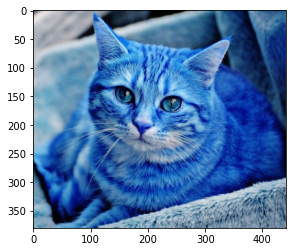

In [8]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(image)

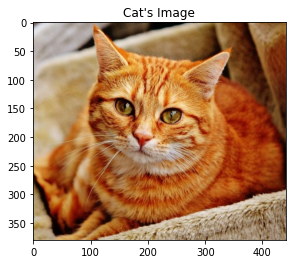

In [9]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Cat's Image")
plt.imshow(cat);

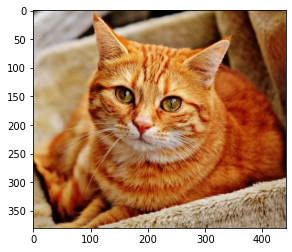

In [10]:
b, g, r = cv2.split(image) # img파일을 b,g,r로 분리
image = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
plt.imshow(image)

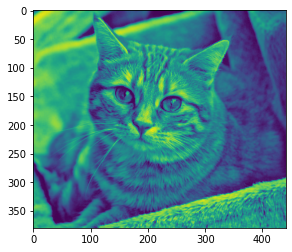

In [15]:
# Grey Scale Image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage)

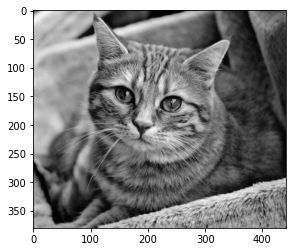

In [16]:
plt.imshow(grayImage, cmap=plt.get_cmap('gray'))

### 3. OpenCV 이미지 연산
##### 이미지 크기 및 픽셀 확인

In [17]:
image = cv2.imread('images/image_2.png')
print(image.shape)
print(image.size)

(720, 1280, 3)
2764800


##### 특정 범위 픽셀 변경

In [18]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
  for j in range(0, 100):
    image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01579594612121582 seconds ---


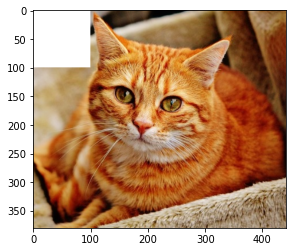

In [19]:
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage)

In [21]:
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0,]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0011320114135742188 seconds ---


#### Numpy로 했을 때 속도가 훨씬 빠르다.

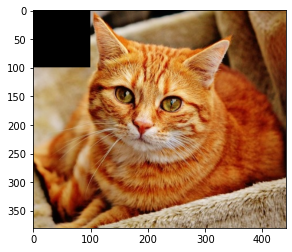

In [22]:
plt.imshow(basicImage)

### 4. OpenCV 이미지 변형
##### 보간법

### 이미지 크기 조절
cv2.resize(image, dsize, fx, fy, interpolation) 이미지의 크기를 조절합니다.
- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법
##### INTER_CUBIC: 사이즈를 크게 할 때 주로 사용합니다.
##### INTER_AREA: 사이즈를 작게 할 때 주로 사용합니다.
##### 보간법은 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미합니다

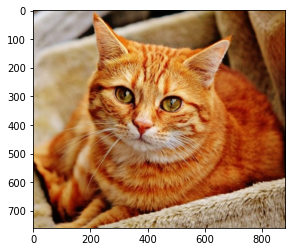

In [25]:
image = cv2.imread('images/cat.jpg')

expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
image = cv2.cvtColor(expand, cv2.COLOR_BGR2RGB)
plt.imshow(image);

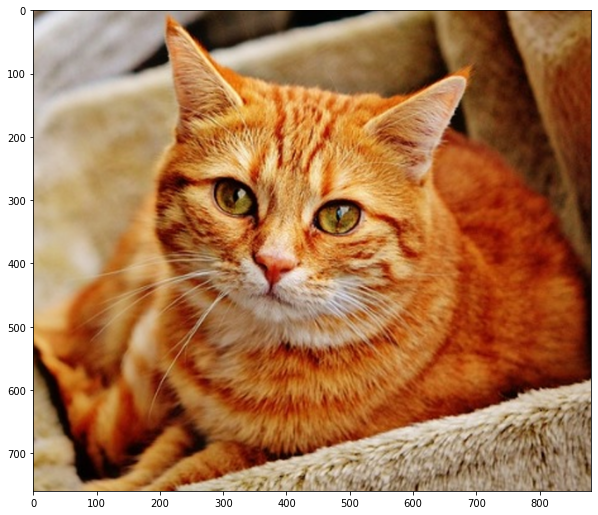

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(image)

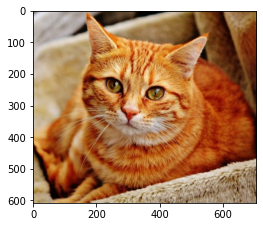

In [29]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.figure(figsize=(4,4))
plt.imshow(shrink)

### 이미지 위치 변경
##### cv2.warpAffine(image, M, dsize)
- M: 변환 행렬
- dsize: Manual Size

변환 행렬과 변환
- 변환 행렬은 다음과 같은 형태로 정의됩니다.
##### 𝑀11 𝑀12 𝑀13
##### 𝑀21 𝑀22 𝑀23
- 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동됩니다.
##### (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)

이미지 위치 변경
- 단순히 이미지의 위치를 변경할 때 변환 행렬은 다음과 같습니다.
### 1 0 𝑡𝑥
### 0 1 𝑡𝑦
- 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동됩니다.
### (𝑎 + 𝑡𝑥, 𝑏 + 𝑡𝑦)

In [33]:
import cv2
import numpy as np
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]
height, width

(380, 441)

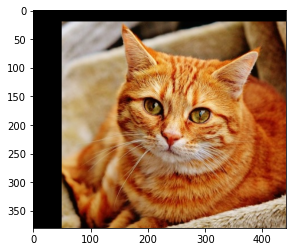

In [35]:
M = np.float32([[1, 0, 50], [0, 1, 20]])
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

# OpenCV 이미지 변형
### 이미지 회전
- 회전 변환을 위한 기본적인 행렬은 다음과 같습니다.
- 이 때 무게 중심을 적용할 수 있는 회전 변환 식은 다음과 같이 정의할 수 있습니다.
##### 𝛼 = 𝑠𝑐𝑎𝑙𝑒 ∗ 𝑐𝑜𝑠𝜃, 𝛽 = 𝑠𝑐𝑎𝑙𝑒 ∗ 𝑠𝑖𝑛𝜃 일 때
##### 𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
##### 𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃
##### 𝛼 𝛽 1 − 𝛼 ∗ 𝑐𝑒𝑛𝑡𝑒𝑟. 𝑥 − 𝛽 ∗ 𝑐𝑒𝑛𝑡𝑒𝑟. 𝑦
##### −𝛽 𝛼 𝛽 ∗ 𝑐𝑒𝑛𝑡𝑒𝑟. 𝑥 + 1 − 𝛼 ∗ 𝑐𝑒𝑛𝑡𝑒𝑟. 𝑦

### cv2.getRotationMatrix2D(center, angle, scale) 이미지 회전을 위한 변환 행렬을 생성합니다.
- center: 회전 중심
- angle: 회전 각도
- scale: Scale Facto

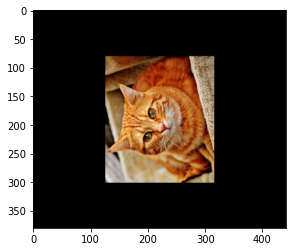

In [36]:
image = cv2.imread('images/cat.jpg')
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width,height))
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

# OpenCV 이미지 합치기
이미지를 합치는 두 가지 방법
##### 1. cv2.add(): Saturation 연산을 수행합니다. 0보다 작으면 0, 255보다 크면 255로 표현
##### 2. np.add(): Modulo 연산을 수행합니다. 256은 0, 257은 1로 표현

In [37]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

- Saturation 연산으로 이미지 합치기

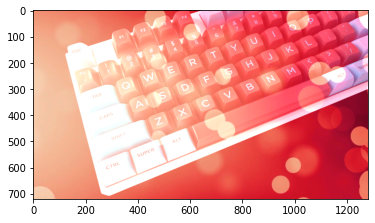

In [39]:
result = cv2.add(image_1, image_2)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

- Modulo 연산으로 합치기

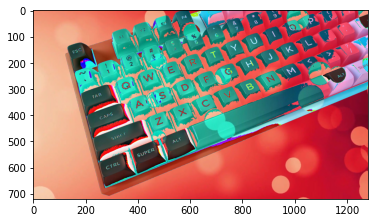

In [40]:
result2 = image_1 + image_2
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

# OpenCV 임계점 처리하기
### 이미지의 기본 이진화
##### cv2.threshold(image, thresh, max_value, type) 임계값을 기준으로 흑/백으로 분류하는 함수
- image: 처리할 Gray Scale 이미지
- thresh: 임계 값 (전체 픽셀에 적용)
- max_value: 임계 값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식

##### THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
##### THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0
##### THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로
##### THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0
##### THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

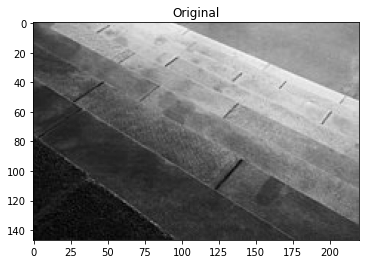

In [45]:
 basic = cv2.imread('images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
 plt.title('Original')
 plt.imshow(basic, cmap=plt.get_cmap('gray'));

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: ignored

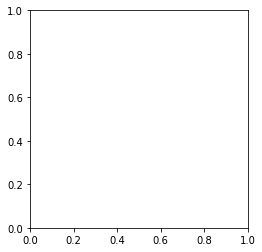

In [50]:
image = cv2.imread('images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)
for i in images:
  plt.imshow('image', i)